# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [48]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

In [49]:
print(crops.shape)
crops.head()

(2200, 5)


,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [50]:
crops["crop"].value_counts()


rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

## Check for missing data
no values where missing

In [51]:
crops.isnull().sum()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

## Basic Statistics

In [52]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

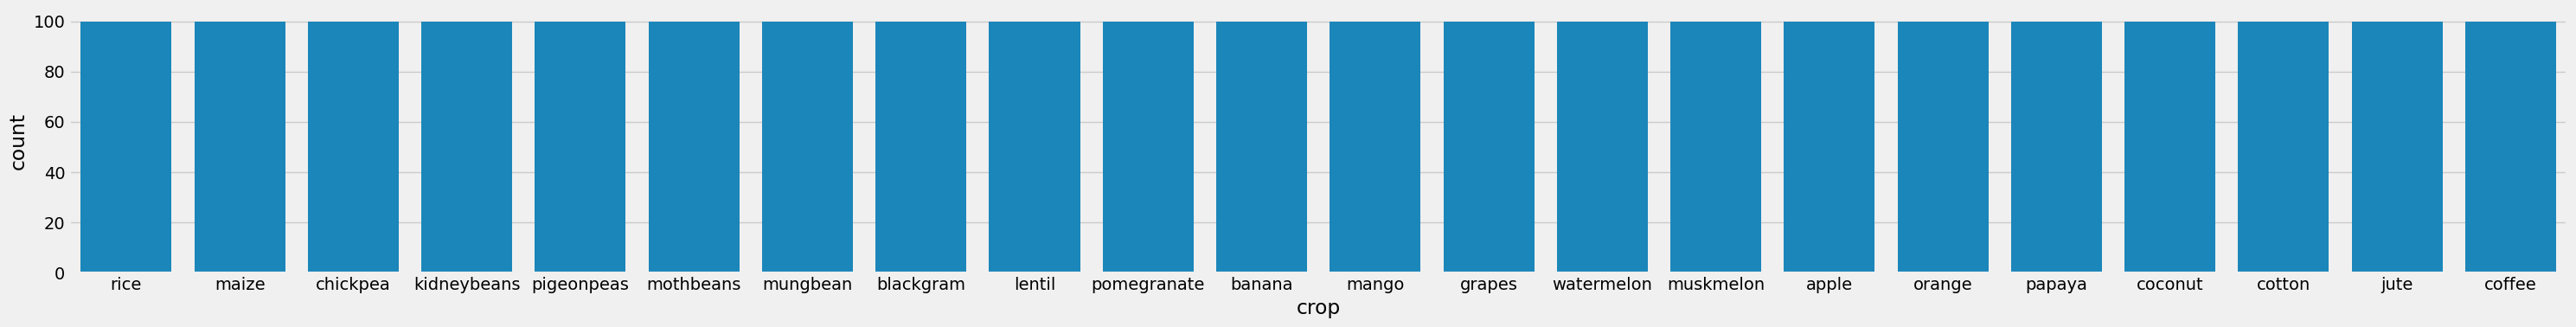

In [54]:
plt.figure(figsize=(30, 4))
sns.countplot(data=crops, x="crop")
plt.tight_layout()
plt.show()

# Visualization of the predictor variables

## Boxplot

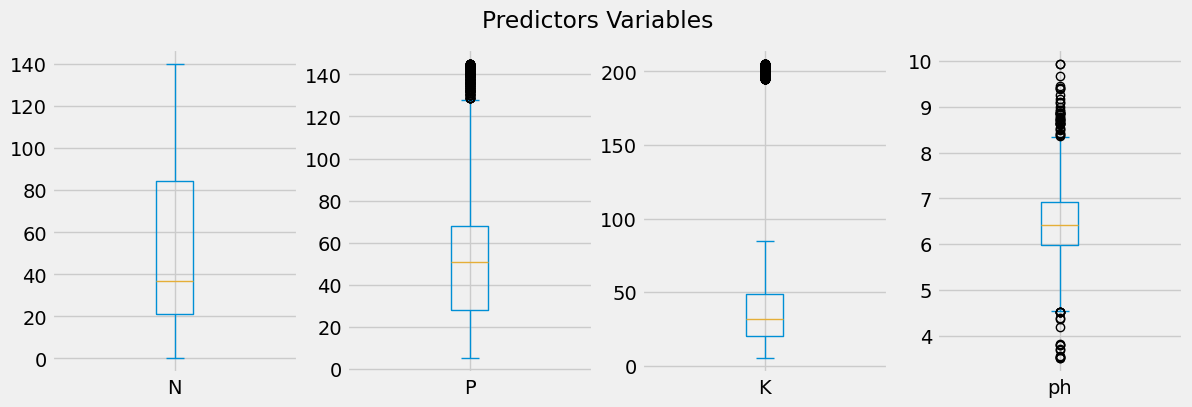

In [55]:
crops.plot(kind="box", subplots=True, figsize=(13, 4))
plt.suptitle("Predictors Variables")
plt.show()

<AxesSubplot: >

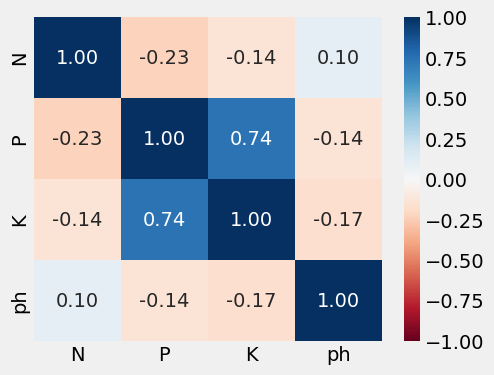

In [56]:
plt.figure(figsize = (5,4))
trans_corr_matrix = crops.drop(columns=['crop']).corr()
sns.heatmap(trans_corr_matrix, annot=True,cmap='RdBu', fmt = '.2f', vmin=-1, vmax=1)

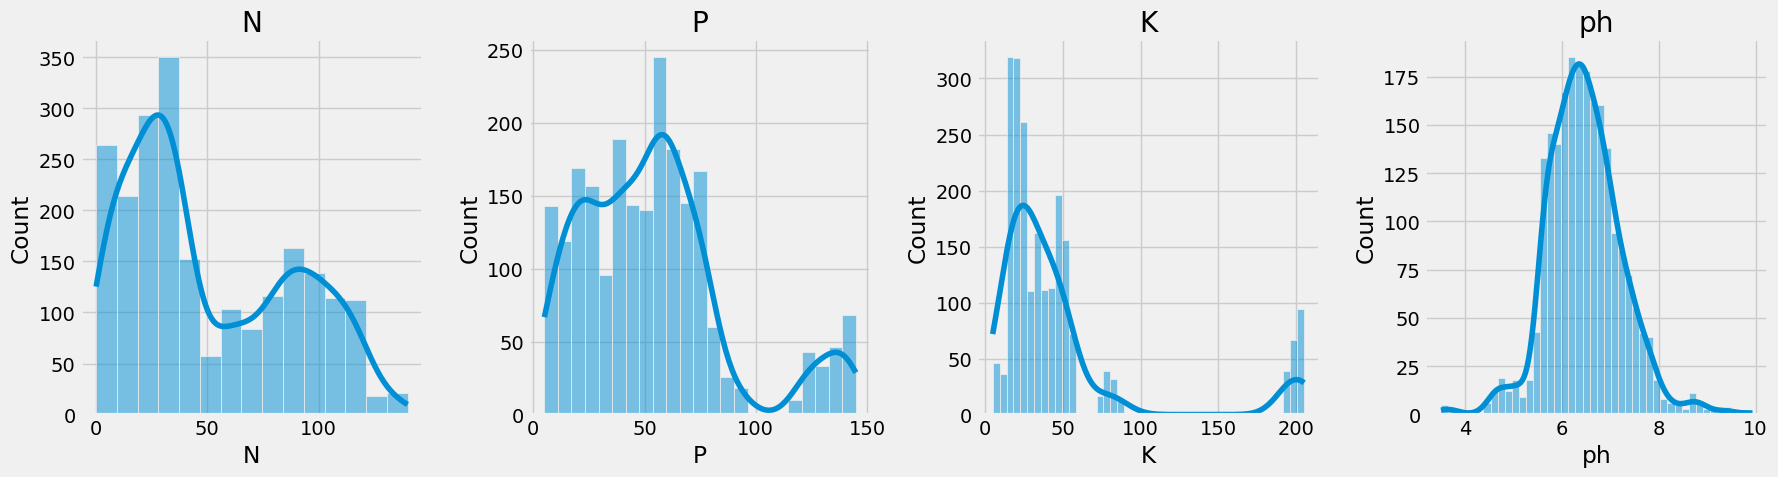

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=len(crops.drop(columns=['crop']).columns), figsize=(18, 5))

for i, col in enumerate(crops.drop(columns=['crop']).columns):
    sns.histplot(crops.drop(columns=['crop'])[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    
plt.tight_layout()
plt.show()

## Split Data, Loop through the features, Train LR Model, Calculate the metrics

In [58]:
features = ['N', 'P', 'K', 'ph']
performance_df = pd.DataFrame(columns=['Feature', 'Accuracy', 'F1 Score', 'Recall', 'Precision'])

# Loop through the features
for feature in features:
    X_train, X_test, y_train, y_test = train_test_split(crops[[feature]], crops['crop'], test_size=0.2, random_state=42)

    model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')

    performance_df = performance_df.append({'Feature': feature, 'Accuracy': accuracy, 'F1 Score': f1, 'Recall': recall, 'Precision': precision}, ignore_index=True)

performance_df

,Feature,Accuracy,F1 Score,Recall,Precision
0,N,0.138636,0.091499,0.138636,0.073667
1,P,0.202273,0.147619,0.202273,0.133536
2,K,0.286364,0.238970,0.286364,0.245040
3,ph,0.097727,0.045327,0.097727,0.031803


## Visualization

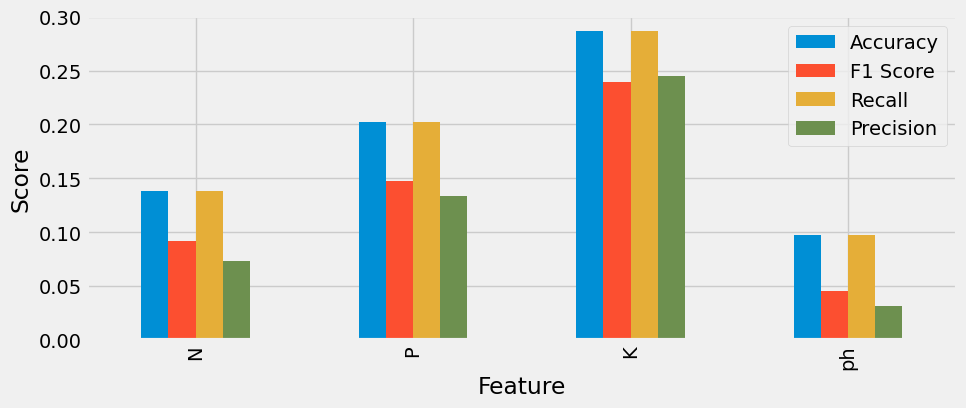

In [59]:
performance_df.set_index('Feature').plot(kind='bar', figsize=(10, 4))
plt.ylabel('Score')
plt.show()

In [60]:
best_predictive_feature = {'Feature': 'K'}